# Matplotlib

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

resultsdf = pd.read_csv('http://128.198.162.191/pydev/dataFiles/OLYMPICS/olympics_1896-2024.csv')

In [65]:
resultsdf.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,EventType,Medal
0,2024,Paris,Cycling Road,Men Individual Time Trial,Evenepoel Remco,Belgium,Male,Athlete,Gold
1,2024,Paris,Cycling Road,Men Individual Time Trial,Ganna Filippo,Italy,Male,Athlete,Silver
2,2024,Paris,Cycling Road,Men Individual Time Trial,Van Aert Wout,Belgium,Male,Athlete,Bronze
3,2024,Paris,Cycling Road,Women Individual Time Trial,Brown Grace,Australia,Female,Athlete,Gold
4,2024,Paris,Cycling Road,Women Individual Time Trial,Henderson Anna,Great Britain,Female,Athlete,Silver


In [66]:
resultsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24012 entries, 0 to 24011
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        24012 non-null  int64 
 1   City        24012 non-null  object
 2   Sport       24012 non-null  object
 3   Discipline  24012 non-null  object
 4   Athlete     20388 non-null  object
 5   Country     24012 non-null  object
 6   Gender      24012 non-null  object
 7   EventType   24012 non-null  object
 8   Medal       24012 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


## Let's calculate the number of Medals by Country

In [67]:
medalsCountry = resultsdf.groupby('Country')['Medal'].count().sort_values(ascending=False)

medalsCountry

Country
United States of America    3424
Germany                     1280
Soviet Union                1272
Great Britain               1207
France                      1139
                            ... 
Paraguay                       1
Guyana                         1
Iraq                           1
Samoa                          1
Sudan                          1
Name: Medal, Length: 162, dtype: int64

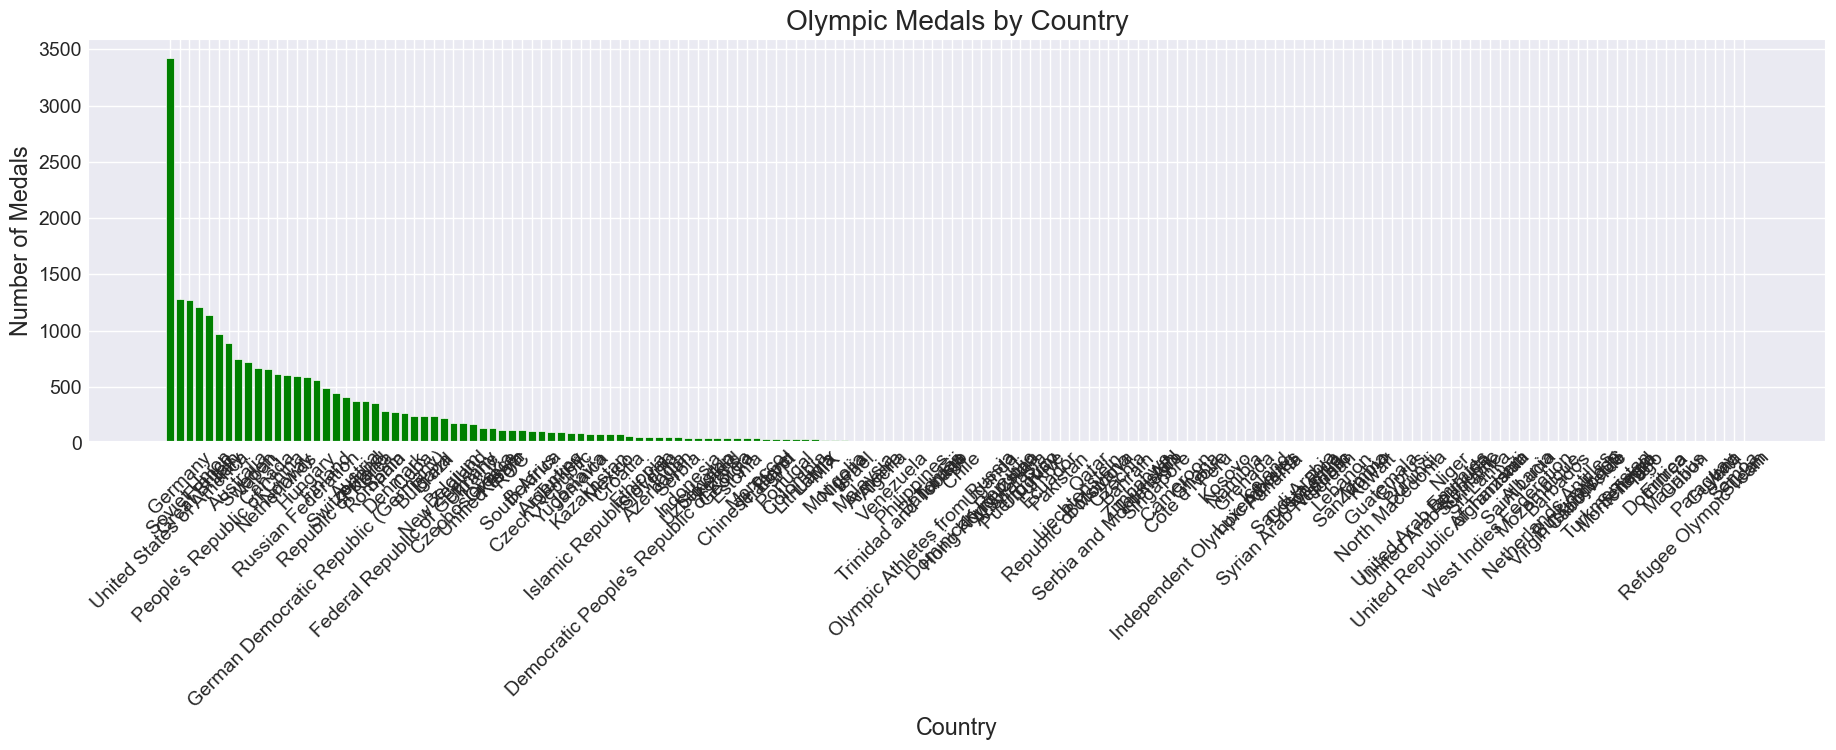

In [68]:
# Visualize this data

# Format the chart
plt.figure(figsize=(20,5))

# Format the chart (bar), we need to pass the 'X' and 'Y' information and labels.
plt.bar(medalsCountry.index, medalsCountry.values, color='green')
plt.title("Olympic Medals by Country")
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45) # Rotates the countries by 90 degrees

# Display the visualization
plt.show()

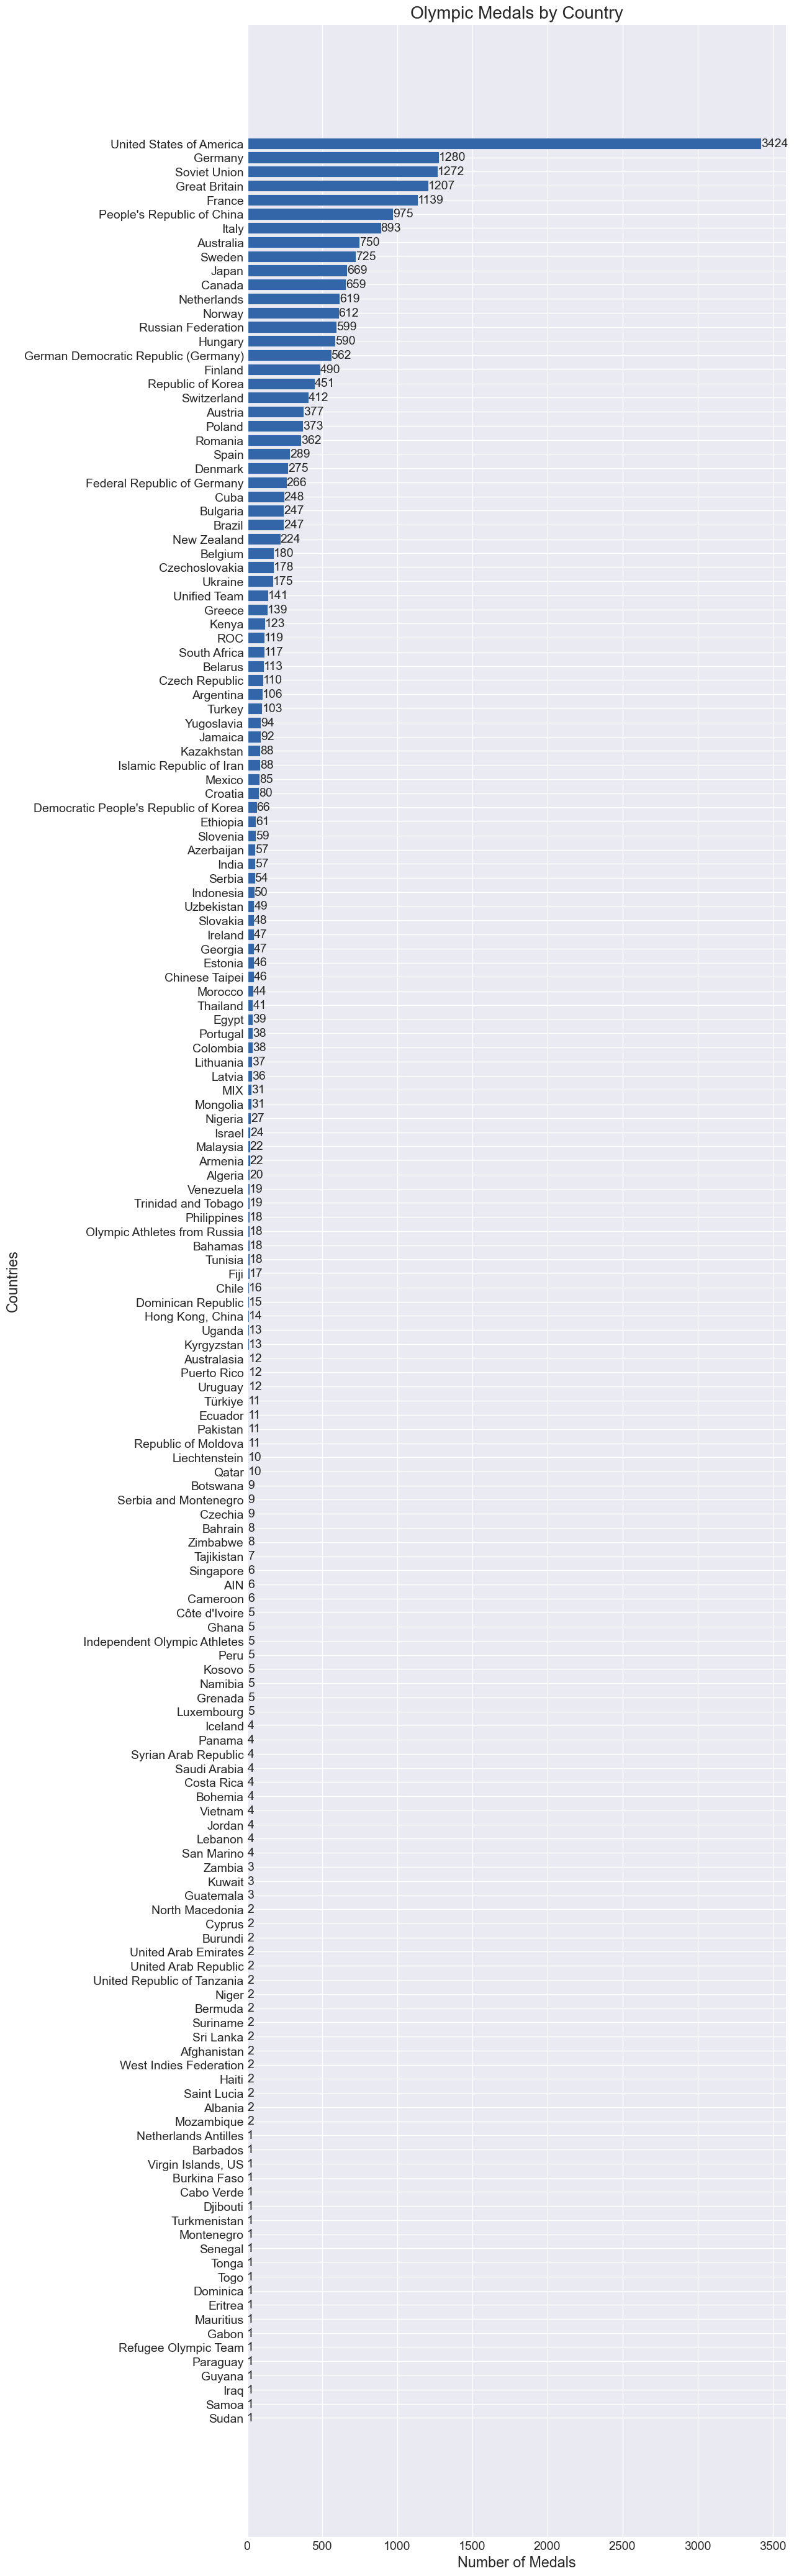

In [69]:
# Format the chart
plt.figure(figsize=(10,50))

# Format the chart (bar), we need to pass the 'X' and 'Y' information and labels.
bars = plt.barh(medalsCountry.index, medalsCountry.values, color='#3266a8')
plt.title("Olympic Medals by Country")
plt.xlabel("Number of Medals")
plt.ylabel("Countries")

# Invert the "Y" axis to show the highest values at the top
plt.gca().invert_yaxis() # gca stands for Get the Current Axis

# Include values in the bar charts
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, # Positioning the text
             f'{bar.get_width():.0f}', # Format the text in integer
             va='center') # Align the text vertically to the center of the bar

# Display the visualization
plt.show()

## Pie chart for USA medals

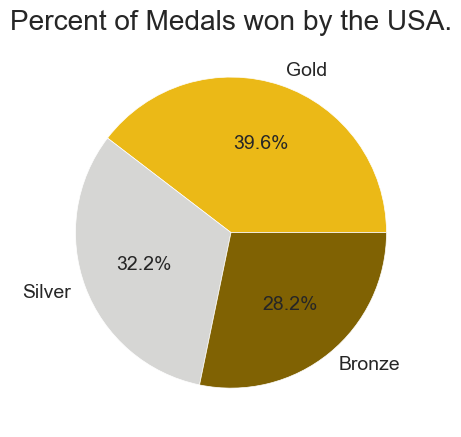

In [70]:
# First filter the data
usResults = resultsdf[resultsdf['Country']=='United States of America']

# Calculate the number of Gold, Silver, and Bronze medals
medalCounts = usResults['Medal'].value_counts()

# Define custom colors
colors = ['#ebb917', '#d6d6d4', '#806203']

# Create a Pie chart
plt.pie(medalCounts.values, labels=medalCounts.index, autopct='%1.1f%%', colors=colors)

# Add a title
plt.title("Percent of Medals won by the USA.")

# Show the chart
plt.show()

## Line chart example of USA Gold medals per year

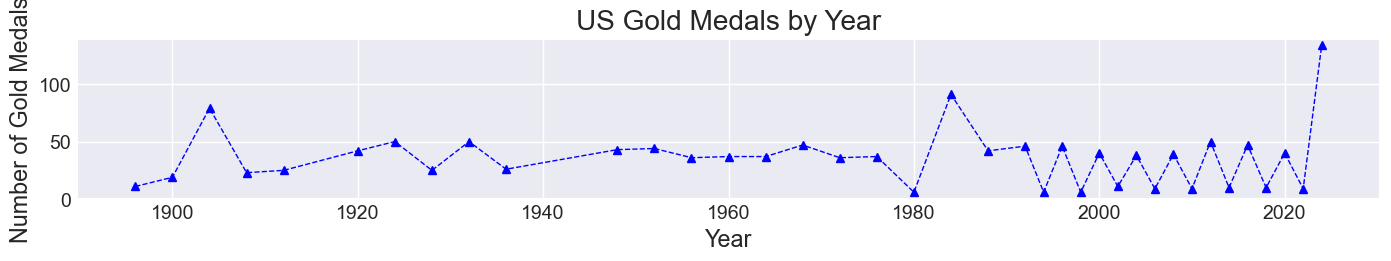

In [71]:
# Filter our data
usGold = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Gold')]

# Group the data to count the number of medals
usGoldYr = usGold.groupby('Year')['Medal'].count()

# Visualize this

plt.figure(figsize=(15,2))

# Format the "look" of the line
plt.plot(usGoldYr.index, usGoldYr.values, color='blue', linestyle='--', linewidth=1, marker='^', markersize=6)

plt.title("US Gold Medals by Year")
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.show()

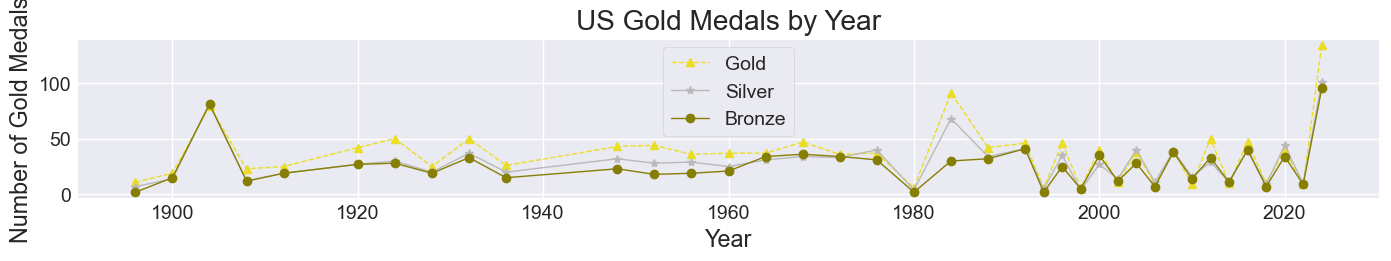

In [72]:
# Filter our data
usGold = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Gold')]
usSilver = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Silver')]
usBronze = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Bronze')]

# Group the data to count the number of medals
usGoldYr = usGold.groupby('Year')['Medal'].count()
usSilverYr = usSilver.groupby('Year')['Medal'].count()
usBronzeYr = usBronze.groupby('Year')['Medal'].count()

# Visualize this

plt.figure(figsize=(15,2))

# Format the "look" of the line
plt.plot(usGoldYr.index, usGoldYr.values, color='#ebdd23', linestyle='--', linewidth=1, marker='^', markersize=6, label="Gold")
plt.plot(usSilverYr.index, usSilverYr.values, color='#babab8', linestyle='-', linewidth=1, marker='*', markersize=6, label="Silver")
plt.plot(usBronzeYr.index, usBronzeYr.values, color='#877e04', linestyle='-', linewidth=1, marker='o', markersize=6, label="Bronze")

plt.title("US Gold Medals by Year")
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.legend()


plt.show()

## Scatter plot

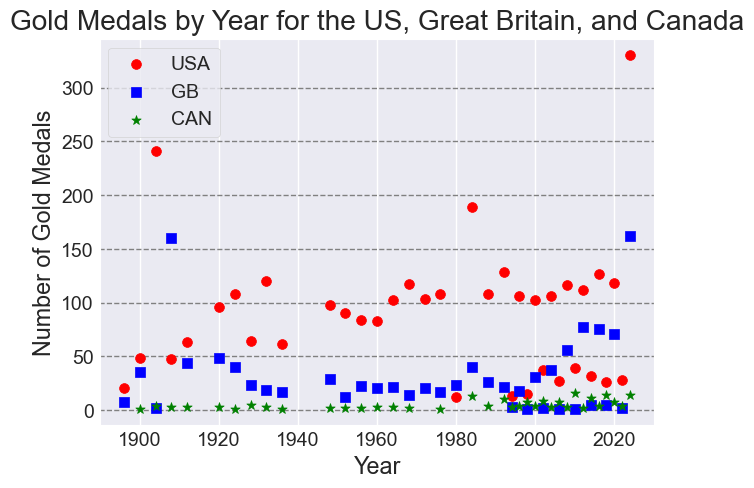

In [73]:
# Let's compare a few Countries
medalsGold = resultsdf[(resultsdf.Country == 'United States of America') |
                       (resultsdf.Country == 'Sweden') |
                       (resultsdf.Country == 'Great Britain') |
                       (resultsdf.Country == 'Canada') &
                       (resultsdf.Medal == 'Gold')]


# Group the data by Year and Country and Count the number of Medals
medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name="Gold Medals")

# Group by Year and Country
medalsByYr = medalsGold.groupby('Year')['Medal'].count()

# Create a pivot table to create a Matris with Years as rows and Countries as columns
medalsPivot = medalsByYrCountry.pivot(index='Year', columns='Country', values='Gold Medals')

# Create the scatter plot
plt.scatter(medalsPivot.index, medalsPivot['United States of America'], label='USA', color='red', marker='o', s=50)
plt.scatter(medalsPivot.index, medalsPivot['Great Britain'], label='GB', color='blue', marker='s', s=50)
plt.scatter(medalsPivot.index, medalsPivot['Canada'], label='CAN', color='green', marker='*', s=50)

# Style the chart
plt.title("Gold Medals by Year for the US, Great Britain, and Canada")
plt.xlabel("Year")
plt.ylabel('Number of Gold Medals')
plt.legend()

plt.grid(axis='y', linestyle='--', color='gray')


# Seaborn examples

In [74]:
import seaborn as sns



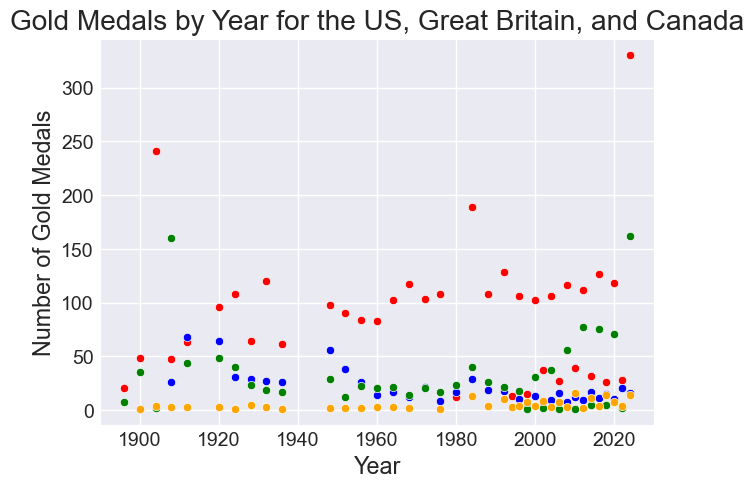

In [75]:
# Let's compare a few Countries
medalsGold = resultsdf[(resultsdf.Country == 'United States of America') |
                       (resultsdf.Country == 'Sweden') |
                       (resultsdf.Country == 'Great Britain') |
                       (resultsdf.Country == 'Canada') &
                       (resultsdf.Medal == 'Gold')]


# Group the data by Year and Country and Count the number of Medals
medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name="Gold Medals")

# Group by Year and Country
medalsByYr = medalsGold.groupby('Year')['Medal'].count()

# Create a pivot table to create a Matris with Years as rows and Countries as columns
medalsPivot = medalsByYrCountry.pivot(index='Year', columns='Country', values='Gold Medals')

# Create the scatter plot
#plt.scatter(medalsPivot.index, medalsPivot['United States of America'], label='USA', color='red', marker='o', s=50)
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='United States of America'], x='Year', y='Gold Medals', color='red')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='Sweden'], x='Year', y='Gold Medals', color='blue')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='Great Britain'], x='Year', y='Gold Medals', color='green')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='Canada'], x='Year', y='Gold Medals', color='orange')

# Create a style template for Seaborn
#sns.set_style("darkgrid")

# Style using Matplot
plt.style.use('fivethirtyeight')

# Style the scatter plot
plt.title("Gold Medals by Year for the US, Great Britain, and Canada")
plt.xlabel("Year")
plt.ylabel('Number of Gold Medals')


plt.show()


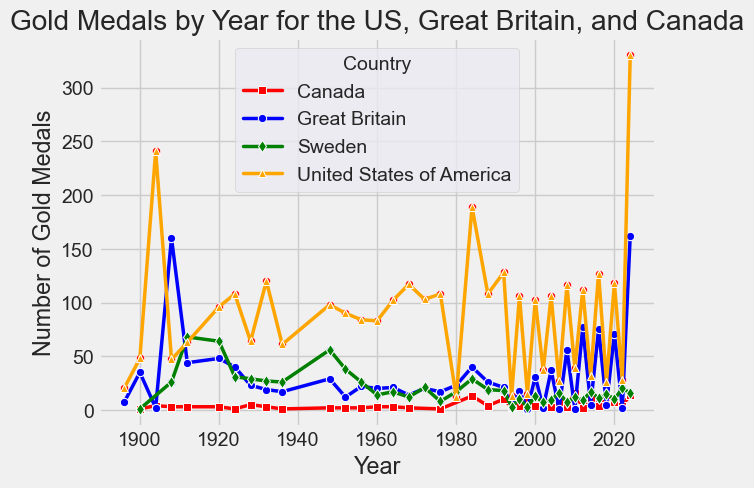

In [76]:
# Seaborn line plot
# Let's compare a few Countries
medalsGold = resultsdf[(resultsdf.Country == 'United States of America') |
                       (resultsdf.Country == 'Sweden') |
                       (resultsdf.Country == 'Great Britain') |
                       (resultsdf.Country == 'Canada') &
                       (resultsdf.Medal == 'Gold')]


# Group the data by Year and Country and Count the number of Medals
medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name="Gold Medals")

# Group by Year and Country
medalsByYr = medalsGold.groupby('Year')['Medal'].count()

# Create a pivot table to create a Matris with Years as rows and Countries as columns
medalsPivot = medalsByYrCountry.pivot(index='Year', columns='Country', values='Gold Medals')

# Create the scatter plot
#plt.scatter(medalsPivot.index, medalsPivot['United States of America'], label='USA', color='red', marker='o', s=50)
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='United States of America'], x='Year', y='Gold Medals', color='red')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='Sweden'], x='Year', y='Gold Medals', color='blue')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='Great Britain'], x='Year', y='Gold Medals', color='green')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='Canada'], x='Year', y='Gold Medals', color='orange')

# Create a style template for Seaborn
sns.set_style("darkgrid")

# Style using Matplot
#plt.style.use('fivethirtyeight')

# Create a line plot of Gold Medals won for each Country using the pivot table
sns.lineplot(data=medalsPivot, dashes=False, linewidth=2.5, palette=['red', 'blue', 'green', 'orange'], markers=['s', 'o', 'd', '^'])

# Style the scatter plot
plt.title("Gold Medals by Year for the US, Great Britain, and Canada")
plt.xlabel("Year")
plt.ylabel('Number of Gold Medals')


plt.show()

# Use built in Seaborn data

In [77]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [78]:
dfCars = sns.load_dataset('car_crashes')

dfCars.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


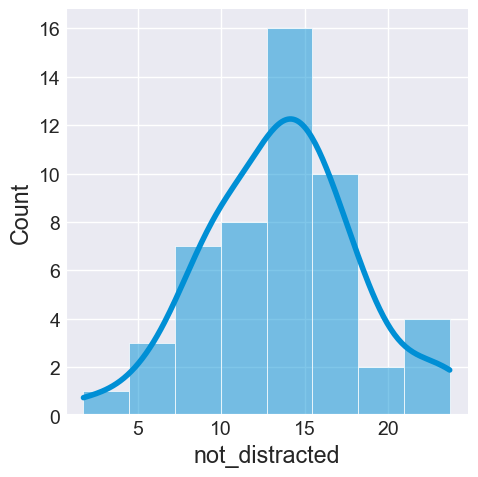

In [79]:
sns.displot(dfCars['not_distracted'], kde=True)

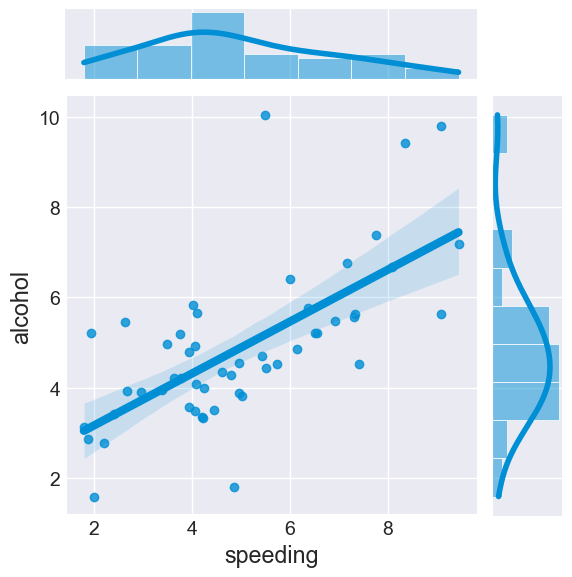

In [80]:
sns.jointplot(x='speeding', y='alcohol', data=dfCars, kind='reg')

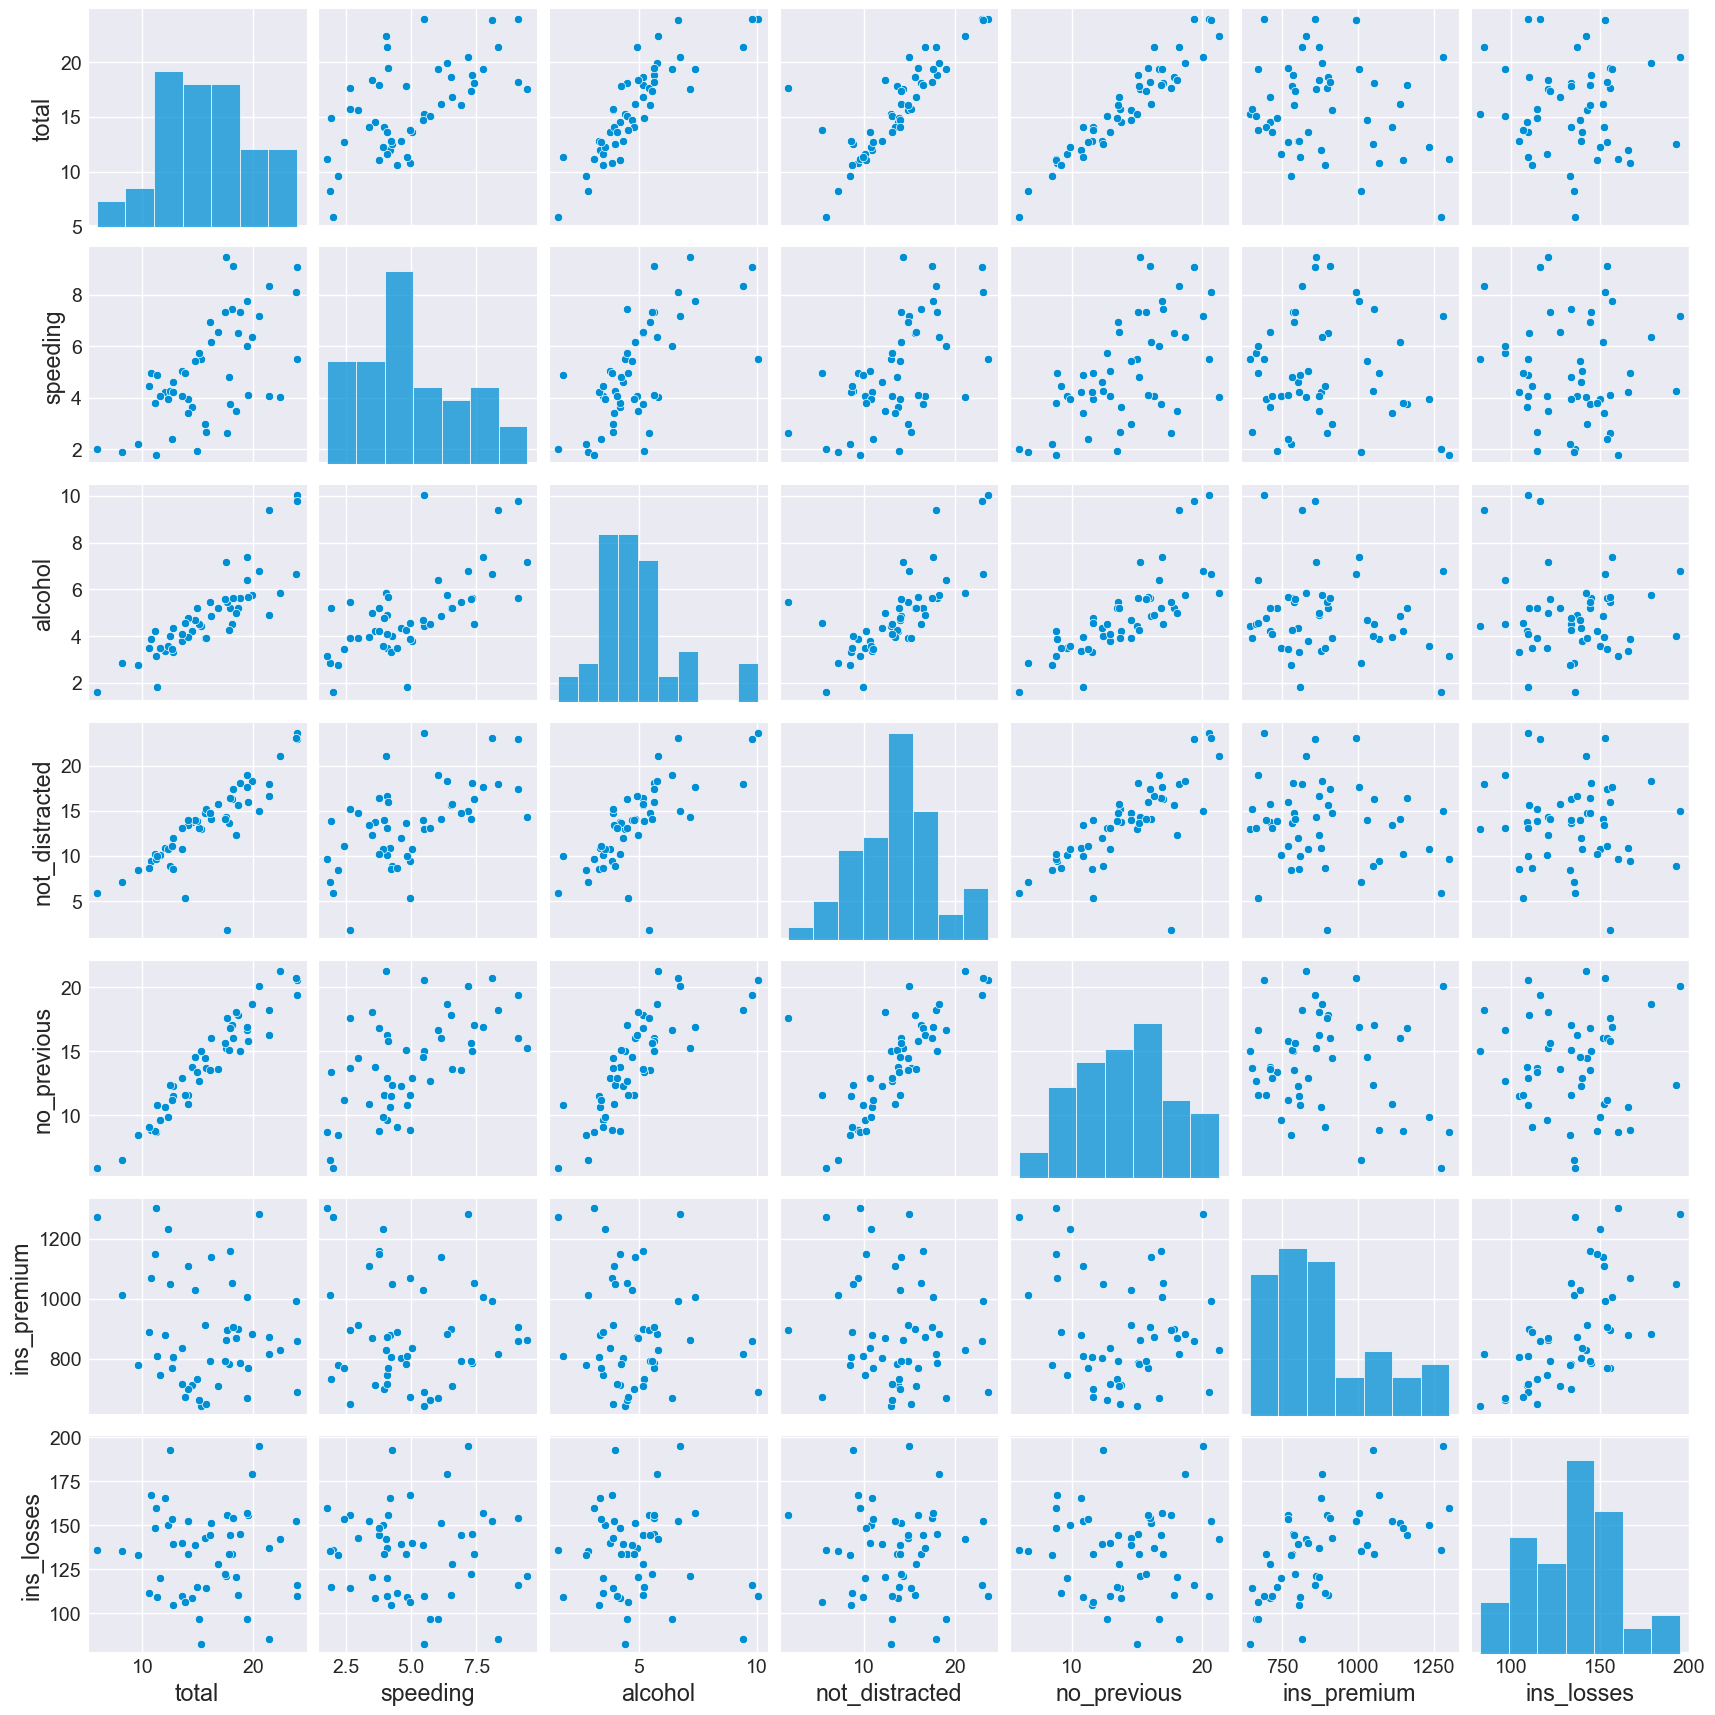

In [81]:
sns.pairplot(dfCars)

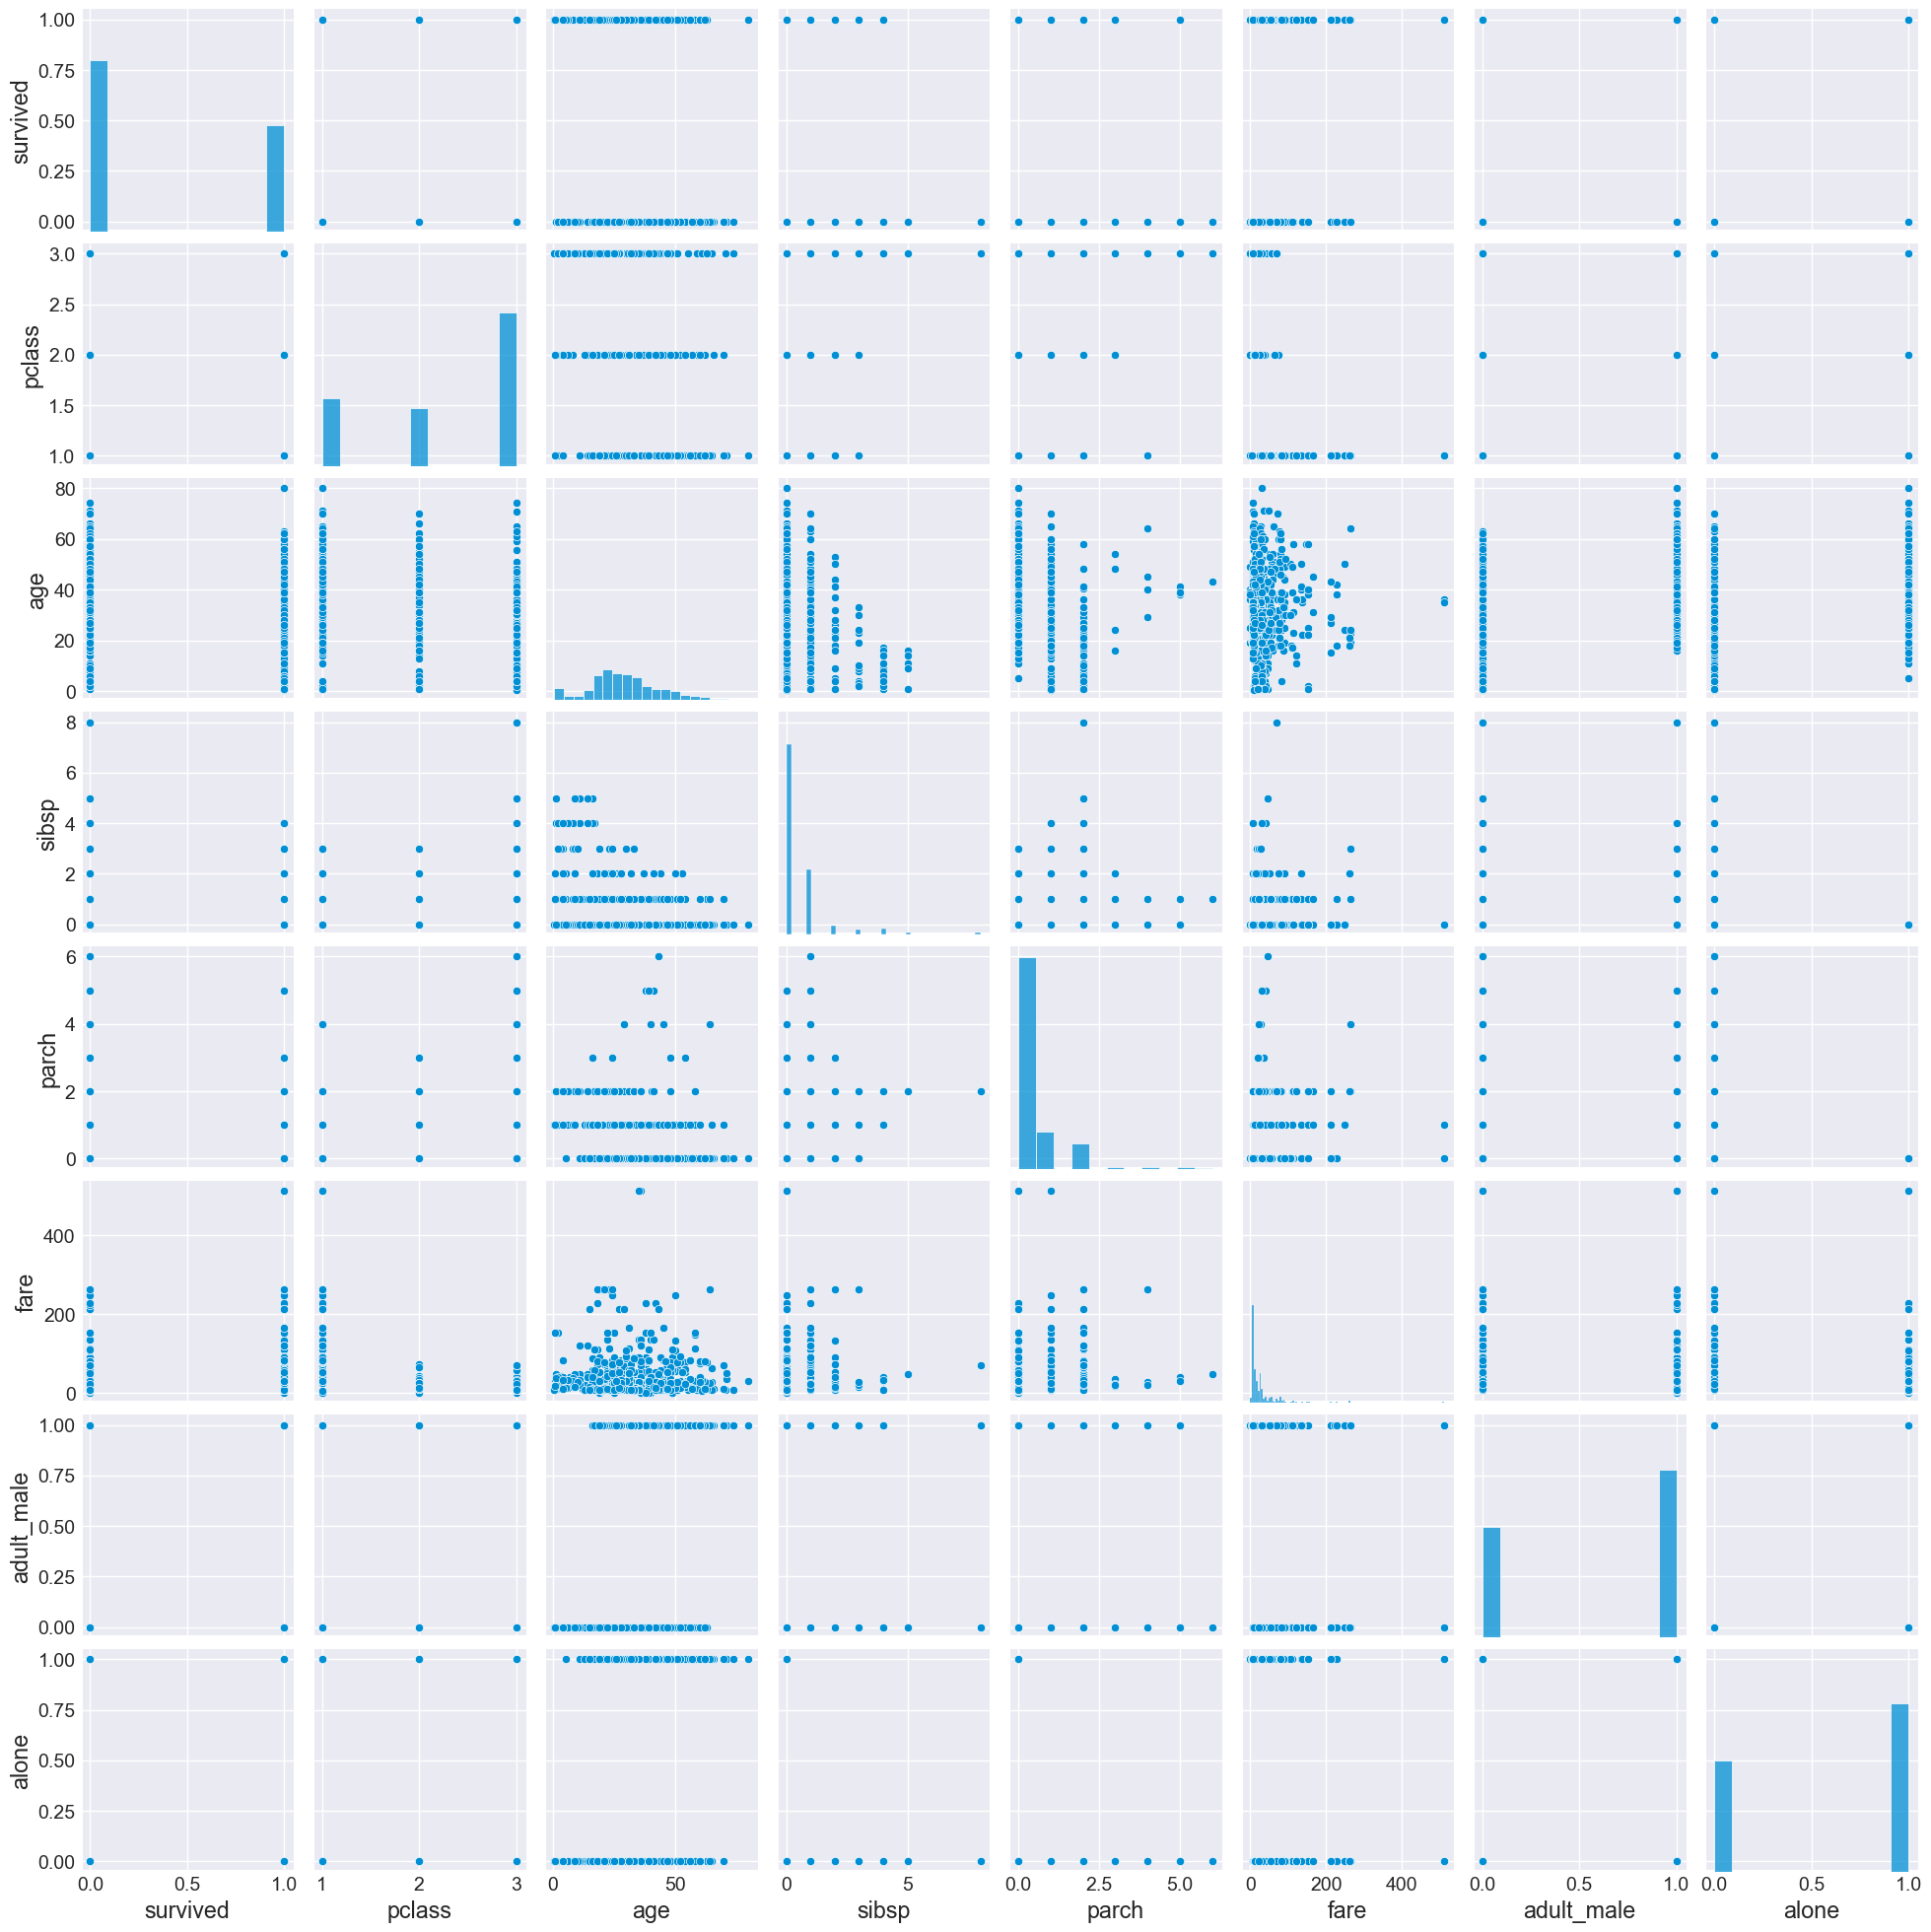

In [82]:
dfTitanic = sns.load_dataset('titanic')

sns.pairplot(dfTitanic)